# African credit scoring challenge

## Problem statement
Financial institutions face the critical challenge of predicting loan defaults to mitigate risk and optimize lending decisions, particularly in Africa's rapidly growing financial markets, characterized by diverse customer demographics and dynamic economic conditions. The objective is to develop a robust and generalizable machine learning model capable of accurately predicting the likelihood of loan defaults for both existing customers and new applicants. Beyond achieving high predictive accuracy, the challenge emphasizes innovation by integrating unique factors relevant to each financial market, enabling more effective and localized risk assessment strategies.


## Data collection
The data was provided by Zindi Africa

## Variable description

0. **ID**: A unique identifier for each entry in the dataset.

1. **customer_id**: Unique identifier for each customer in the dataset.

2. **country_id**: Identifier or code representing the country where the customer resides or where the loan was issued.

3. **tbl_loan_id**: Unique identifier for each loan associated with the customer.

4. **Total_Amount**: The total loan amount initially disbursed to the customer.

5. **Total_Amount_to_Repay**: The total amount the customer is expected to repay, including principal, interest, and fees.

6. **interest_amount**: The interest charged on the loan as part of the repayment amount.

7. **loan_type**: The category or type of loan.

8. **disbursement_date**: The date when the loan amount was disbursed to the customer.

9. **duration**: The length of the loan term, typically expressed in days

10. **lender_id**: Unique identifier for the lender or institution that issued the loan.

11. **New_versus_Repeat**: Indicates whether the loan is the customer's first loan ("New") or if the customer has taken loans before ("Repeat").

12. **Amount_Funded_By_Lender**: The portion of the loan funded directly by the lender.

13. **Lender_portion_Funded**: Percentage of the total loan amount funded by the lender.

14. **due_date**: The date by which the loan repayment is due.

15. **Lender_portion_to_be_repaid**: The portion of the outstanding loan that needs to be repaid to the lender.

16. **target**: This variables takes the value 0 or 1. 1 means the customer defaulted on the loan, whereas 0 means, the customer paid the loan.

## Loading the data

In [ ]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")
sub = pd.read_csv("/content/SampleSubmission.csv")
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200

In [ ]:
train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [ ]:
test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [ ]:
sub.head()

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0


### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [ ]:
train.shape, test.shape , sub.shape

((68654, 16), (18594, 15), (18594, 2))

In [ ]:
train.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [ ]:
train.isnull().sum()

,0
ID,0
customer_id,0
country_id,0
tbl_loan_id,0
lender_id,0
loan_type,0
Total_Amount,0
Total_Amount_to_Repay,0
disbursement_date,0
due_date,0


In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
test.isnull().sum()

,0
ID,0
customer_id,0
country_id,0
tbl_loan_id,0
lender_id,0
loan_type,0
Total_Amount,0
Total_Amount_to_Repay,0
disbursement_date,0
due_date,0


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,68654.0,254390.256780,26642.719918,145.0,248945.750000,255361.0,262269.25,3.127370e+05
tbl_loan_id,68654.0,263056.266248,39486.661487,101323.0,233942.250000,260305.5,286962.75,3.753200e+05
lender_id,68654.0,266420.528462,3590.999004,245684.0,267278.000000,267278.0,267278.00,2.672780e+05
Total_Amount,68654.0,14836.828617,141649.868388,2.0,2295.000000,5249.0,11450.00,2.300000e+07
Total_Amount_to_Repay,68654.0,15639.929901,165078.352830,0.0,2329.000000,5325.0,11650.00,2.541500e+07
duration,68654.0,8.544586,13.343145,1.0,7.000000,7.0,7.00,1.096000e+03
Amount_Funded_By_Lender,68654.0,2545.663204,11922.724169,0.0,234.000000,915.0,2272.65,1.600000e+06
Lender_portion_Funded,68654.0,0.218679,0.129832,0.0,0.118712,0.3,0.30,1.168119e+00
Lender_portion_to_be_repaid,68654.0,2652.621493,13380.063537,0.0,239.000000,934.0,2317.00,1.821338e+06
target,68654.0,0.018324,0.134120,0.0,0.000000,0.0,0.00,1.000000e+00


In [ ]:
train.describe(include='O').T

,count,unique,top,freq
ID,68654,68654,ID_266671248032267278,1
country_id,68654,1,Kenya,68654
loan_type,68654,22,Type_1,61723
disbursement_date,68654,768,2022-07-16,938
due_date,68654,893,2022-07-23,940
New_versus_Repeat,68654,2,Repeat Loan,68087


In [ ]:
train.apply(lambda x: len(x.unique()))

,0
ID,68654
customer_id,6540
country_id,1
tbl_loan_id,66520
lender_id,4
loan_type,22
Total_Amount,19076
Total_Amount_to_Repay,21920
disbursement_date,768
due_date,893


### Key takeaways
- There are no missing values and duplicates  in both train and test dataset.
- The data is mostlly made up of numerical columns and few categorical columns.
- The numerical  data contains alot of outliers as seen by the high difference in the 75 percentiles  and max values
- Also the data is highly skewed

## EXPLORATORY DATA ANALYSIS

In [ ]:
# Getting all different types of features
id_features = ['ID', 'customer_id', 'country_id', 'tbl_loan_id','lender_id']
print(f'ID Features:', id_features)

date_features = ['disbursement_date', 'due_date']
print(f'Date Features:', date_features)

target_feature = ['target']
print(f'Target Feature:', target_feature)

num_features = [feature for feature in train.columns if train[feature].dtype != 'O' and feature not in (id_features+target_feature)]
print(f'Numerical Features:', num_features)

cat_features = [feature for feature in train.columns if train[feature].dtype == 'O' and feature not in (id_features+date_features)]
print(f'Categorical Features:', cat_features)

discrete_features = [feature for feature in num_features if len(train[feature].unique()) <= 25 and feature not in id_features]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_features if feature not in discrete_features and feature not in id_features]
print(f'Continuous Features:', continuous_features)


ID Features: ['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id']
Date Features: ['disbursement_date', 'due_date']
Target Feature: ['target']
Numerical Features: ['Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid']
Categorical Features: ['loan_type', 'New_versus_Repeat']
Discrete Features: []
Continuous Features: ['Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid']


## Numerical features





#### Total amount

In [ ]:
train['Total_Amount'].value_counts()

,count
Total_Amount,
1500.0,890
5000.0,612
10000.0,363
4699.0,273
2199.0,265
...,...
38282.0,1
39127.0,1
89194.0,1


In [ ]:
#grouping total amount into high ,medium and low amount loans
def total_amount_group(x):
  if x <= 10000:
    return 'low_amount'
  elif x <= 50000:
    return 'medium_amount'
  else:
    return 'high_amount'

train['total_amount_bins'] = train['Total_Amount'].apply(total_amount_group)
test['total_amount_bins'] = test['Total_Amount'].apply(total_amount_group)

<Axes: xlabel='Total_Amount', ylabel='Density'>

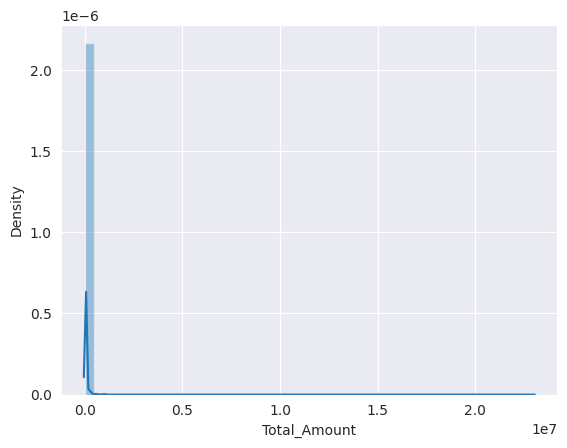

In [ ]:
sns.distplot(train['Total_Amount'],hist=True)

In [ ]:
#log transforming
train['Total_Amount_log'] = np.log1p(train['Total_Amount'])
test['Total_Amount_log'] = np.log1p(test['Total_Amount'])

#### total amount to repay

In [ ]:
train['Total_Amount_to_Repay'].value_counts()

,count
Total_Amount_to_Repay,
5176.0,380
1555.0,247
1500.0,160
2199.0,147
4699.0,126
...,...
33921.0,1
19683.0,1
19485.0,1


<Axes: xlabel='Total_Amount_to_Repay', ylabel='Density'>

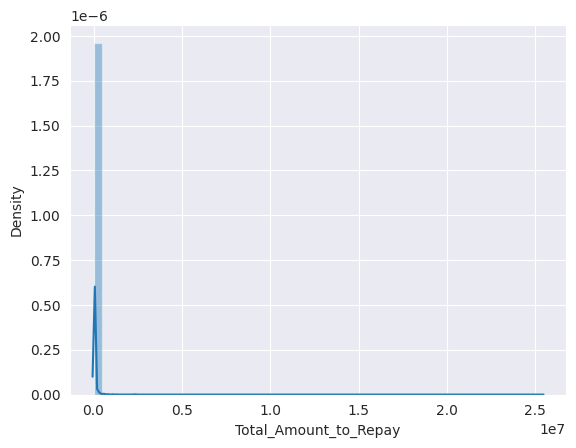

In [ ]:
sns.distplot(train['Total_Amount_to_Repay'],hist=True)


Before any transformation we can create a new column called interestFees from the difference between total amount to repay and total amount

In [ ]:
train['interestFees'] = train['Total_Amount_to_Repay'] - train['Total_Amount']
test['interestFees'] = test['Total_Amount_to_Repay'] - test['Total_Amount']

In [ ]:
train['interestFees'].value_counts()

,count
interestFees,
0.0,24064
16.0,459
176.0,450
30.0,445
55.0,444
...,...
818.0,1
2238.0,1
2121.0,1


<Axes: xlabel='interestFees', ylabel='Density'>

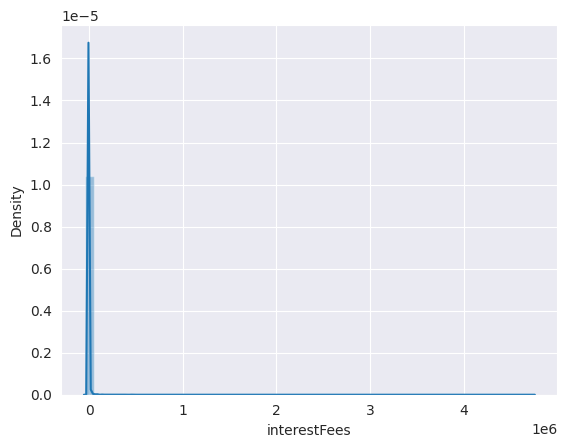

In [ ]:
sns.distplot(train['interestFees'],hist=True)

In [ ]:
def high_interest_rates(x):
  if x <= 1000:
    return 'low_interest'
  else:
    return 'high_interest'


train['interestFees_bins'] = train['interestFees'].apply(high_interest_rates)
test['interestFees_bins'] = test['interestFees'].apply(high_interest_rates)

#### duration

In [ ]:
train['duration'].value_counts()

,count
duration,
7,64973
14,1567
30,958
90,249
60,201
45,118
31,77
29,61
25,34


Text(0.5, 0, 'duration')

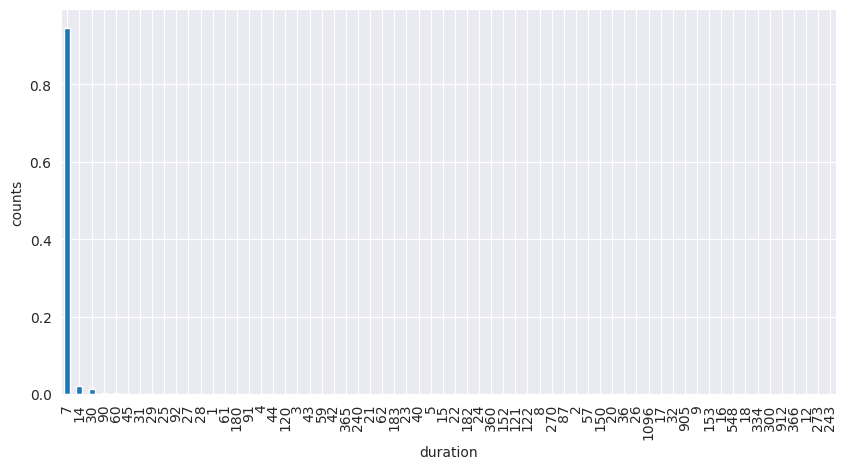

In [ ]:
plt.figure(figsize=(10,5))
train['duration'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('duration')

#### Amount funded by lender

In [ ]:
train['Amount_Funded_By_Lender'].value_counts()

,count
Amount_Funded_By_Lender,
0.00,8520
450.00,660
1000.00,438
1200.00,188
600.00,187
...,...
6455.70,1
10.21,1
8611.72,1


<Axes: xlabel='Amount_Funded_By_Lender', ylabel='Density'>

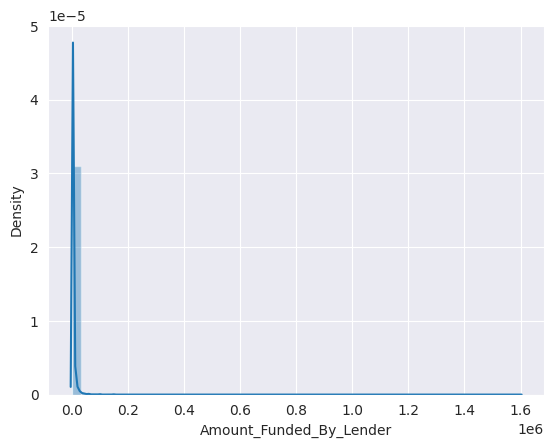

In [ ]:
sns.distplot(train['Amount_Funded_By_Lender'],hist=True)

In [ ]:
#log transformation
train['Amount_Funded_By_Lender_log'] = np.log1p(train['Amount_Funded_By_Lender'])
test['Amount_Funded_By_Lender_log'] = np.log1p(test['Amount_Funded_By_Lender'])

In [ ]:
def lender_funded_group(x):
  if x <= 10000:
    return 'low_lender_funded'
  else:
    return 'high_lender_funded'


train['Lender_portion_Funded_bins'] = train['Amount_Funded_By_Lender'].apply(lender_funded_group)
test['Lender_portion_Funded_bins'] = test['Amount_Funded_By_Lender'].apply(lender_funded_group)

Lender_portion_Funded

In [ ]:
train['Lender_portion_Funded'].value_counts()

,count
Lender_portion_Funded,
0.300000,41835
0.000000,8520
0.200000,2234
0.160000,772
0.500000,354
...,...
0.004085,1
0.094147,1
0.024303,1


<Axes: xlabel='Lender_portion_Funded', ylabel='Density'>

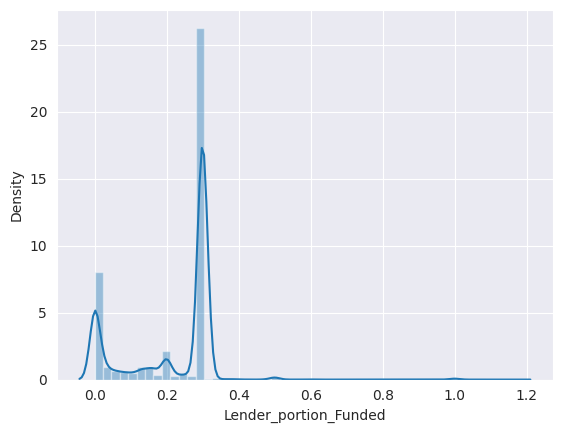

In [ ]:
sns.distplot(train['Lender_portion_Funded'],hist=True)

#### Lender_portion_to_be_repaid

In [ ]:
train['Lender_portion_to_be_repaid'].value_counts()

,count
Lender_portion_to_be_repaid,
0.0,8899
1035.0,353
1.0,317
2.0,217
467.0,202
...,...
10211.0,1
24868.0,1
8138.0,1


<Axes: xlabel='Lender_portion_to_be_repaid', ylabel='Density'>

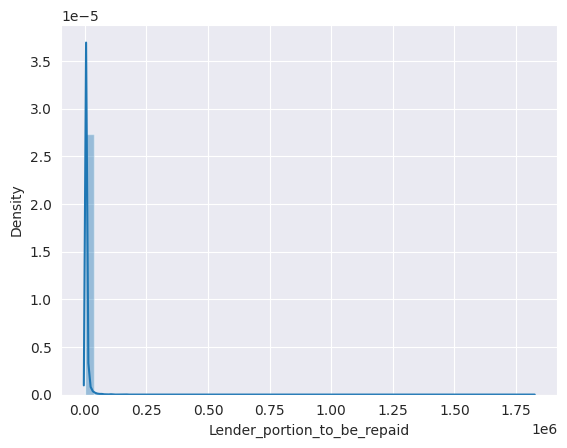

In [ ]:
sns.distplot(train['Lender_portion_to_be_repaid'],hist=True)

In [ ]:
#log transformation
train['Lender_portion_to_be_repaid_log'] = np.log1p(train['Lender_portion_to_be_repaid'])
test['Lender_portion_to_be_repaid_log'] = np.log1p(test['Lender_portion_to_be_repaid'])

- Most of the numerical features were  positively skewed hence the log transformation and binning

## Categorical features

#### Loan type

In [ ]:
train['loan_type'].value_counts()

,count
loan_type,
Type_1,61723
Type_7,2790
Type_5,1521
Type_4,1235
Type_10,466
Type_6,357
Type_9,205
Type_14,99
Type_2,74


In [ ]:
test['loan_type'].value_counts()

,count
loan_type,
Type_1,13618
Type_3,3039
Type_7,592
Type_2,454
Type_5,298
Type_4,253
Type_6,98
Type_10,96
Type_9,42


In [ ]:
### binning them into groups
def loan_type_group(x):
  if x  == 'Type_1':
    return 'popular_loan'
  else:
    return 'Unpopular_loan'

train['loan_type_bins'] = train['loan_type'].apply(loan_type_group)
test['loan_type_bins'] = test['loan_type'].apply(loan_type_group)

In [ ]:
train['loan_type_bins'].value_counts()

,count
loan_type_bins,
popular_loan,61723
Unpopular_loan,6931


In [ ]:
test['loan_type_bins'].value_counts()

,count
loan_type_bins,
popular_loan,13618
Unpopular_loan,4976


#### New_versus_Repeat

In [ ]:
train['New_versus_Repeat'].value_counts()

,count
New_versus_Repeat,
Repeat Loan,68087
New Loan,567


Text(0, 0.5, 'Count')

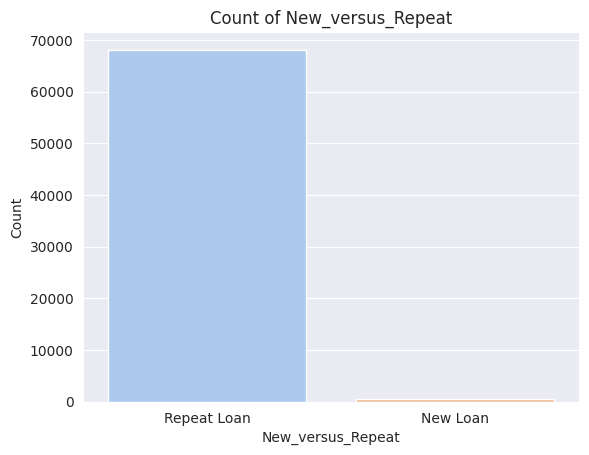

In [ ]:
sns.countplot(data=train, x='New_versus_Repeat', palette='pastel', order=train['New_versus_Repeat'].value_counts().index)

# Add labels and title
plt.title('Count of New_versus_Repeat')
plt.xlabel('New_versus_Repeat')
plt.ylabel('Count')

## Date Features

In [ ]:
from datetime import datetime

train['due_date'] = pd.to_datetime(train['due_date'])
test['due_date'] = pd.to_datetime(test['due_date'])

train['disbursement_date'] = pd.to_datetime(train['disbursement_date'])
test['disbursement_date'] = pd.to_datetime(test['disbursement_date'])


In [ ]:
train['year_dis'] = train['disbursement_date'].dt.year
test['year_dis'] = test['disbursement_date'].dt.year

train['month_dis'] = train['disbursement_date'].dt.month
test['month_dis'] = test['disbursement_date'].dt.month

train['quarter_dis'] = train['disbursement_date'].dt.quarter
test['quarter_dis'] = test['disbursement_date'].dt.quarter

train['day_dis'] = train['disbursement_date'].dt.day
test['day_dis'] = test['disbursement_date'].dt.day

train['day_of_week_dis'] = train['disbursement_date'].dt.dayofweek
test['day_of_week_dis'] = test['disbursement_date'].dt.dayofweek

train['year_due'] = train['due_date'].dt.year
test['year_due'] = test['due_date'].dt.year

train['month_due'] = train['due_date'].dt.month
test['month_due'] = test['due_date'].dt.month

train['quarter_due'] = train['due_date'].dt.quarter
test['quarter_due'] = test['due_date'].dt.quarter

train['day_due'] = train['due_date'].dt.day
test['day_due'] = test['due_date'].dt.day

train['day_of_week_due'] = train['due_date'].dt.dayofweek
test['day_of_week_due'] = test['due_date'].dt.dayofweek




In [ ]:
## dropping the date features
train.drop(['disbursement_date','due_date'], axis=1, inplace=True)
test.drop(['disbursement_date','due_date'], axis=1, inplace=True)

## ID_features

In [ ]:
train['country_id'].value_counts()

,count
country_id,
Kenya,68654


In [ ]:
test['country_id'].value_counts()

,count
country_id,
Kenya,15069
Ghana,3525


- Ghana is included in our test data but not in the train data hence we will not use this column for our training.

In [ ]:
train['lender_id'].value_counts()

,count
lender_id,
267278,64653
251804,3542
267277,271
245684,188


In [ ]:
test['lender_id'].value_counts()

,count
lender_id,
267278,14221
296542,1803
297183,1264
251804,761
296540,179
297182,163
245684,157
267277,46


In [ ]:
##binning them into groups
def lender_group(x):
  if x == 267278:
    return 'popular_lender'
  else:
    return 'Unpopular_lender'

train['lender_id_bin'] = train['lender_id'].apply(lender_group)
test['lender_id_bin'] = test['lender_id'].apply(lender_group)

- Decided to introduce grouping because some lenders are present in the test data while missing in the train data which will confuse our models

## Target feature

In [ ]:
train['target'].value_counts()

,count
target,
0,67396
1,1258


Text(0, 0.5, 'Count')

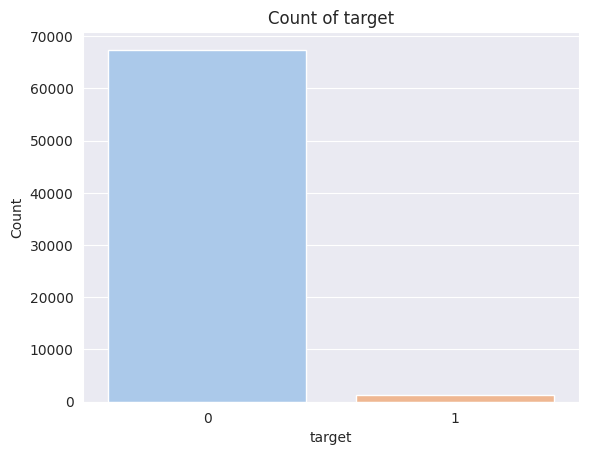

In [ ]:
sns.countplot(data=train, x='target', palette='pastel', order=train['target'].value_counts().index)

# Add labels and title
plt.title('Count of target')
plt.xlabel('target')
plt.ylabel('Count')

- This is a highly imbalanced dataset  which means we have to deal with it through sampling or class weights

## Feature engineering and variable interaction

In [ ]:
train.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay', 'duration',
       'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target', 'total_amount_bins',
       'Total_Amount_log', 'interestFees', 'interestFees_bins',
       'Amount_Funded_By_Lender_log', 'Lender_portion_Funded_bins',
       'Lender_portion_to_be_repaid_log', 'loan_type_bins', 'year_dis',
       'month_dis', 'quarter_dis', 'day_dis', 'day_of_week_dis', 'year_due',
       'month_due', 'quarter_due', 'day_due', 'day_of_week_due',
       'lender_id_bin'],
      dtype='object')

#### Interest burden
Borrowers with higher interest burdens might be more likely to default.

In [ ]:
train['Interest_Burden']= train['interestFees']/train['Total_Amount']
test['Interest_Burden']= test['interestFees']/test['Total_Amount']

#### Debt_rate



In [ ]:
train['Debt_rate']= train['Amount_Funded_By_Lender']/train['Total_Amount']
test['Debt_rate']= test['Amount_Funded_By_Lender']/test['Total_Amount']

#### Funding Gap
higher funding gap suggests a borrower had to secure alternative funding sources

In [ ]:
train['Funding_Gap']= train['Total_Amount']-train['Amount_Funded_By_Lender']
test['Funding_Gap']= test['Total_Amount']-test['Amount_Funded_By_Lender']

##### variable interaction

In [ ]:
train['prod_fees_burden_funding_gap'] = train['interestFees']*train['Interest_Burden']*train['Funding_Gap']*train['Debt_rate']
test['prod_fees_burden_funding_gap'] = test['interestFees']*test['Interest_Burden']*test['Funding_Gap']*test['Debt_rate']

In [ ]:
train['add_fees_burden_funding_gap']= train['interestFees']+train['Interest_Burden']+train['Funding_Gap']+train['Debt_rate']
test['add_fees_burden_funding_gap']= test['interestFees']+test['Interest_Burden']+test['Funding_Gap']+test['Debt_rate']

In [ ]:
train['duration_interestfees']= train['duration']*train['interestFees']
test['duration_interestfees']= test['duration']*test['interestFees']

train['duration_total_amount']= train['duration']*train['Total_Amount']
test['duration_total_amount']= test['duration']*test['Total_Amount']

train['duration_lender_funded']= train['duration']*train['Lender_portion_to_be_repaid']
test['duration_lender_funded']= test['duration']*test['Lender_portion_to_be_repaid']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               68654 non-null  object 
 1   customer_id                      68654 non-null  int64  
 2   country_id                       68654 non-null  object 
 3   tbl_loan_id                      68654 non-null  int64  
 4   lender_id                        68654 non-null  int64  
 5   loan_type                        68654 non-null  object 
 6   Total_Amount                     68654 non-null  float64
 7   Total_Amount_to_Repay            68654 non-null  float64
 8   duration                         68654 non-null  int64  
 9   New_versus_Repeat                68654 non-null  object 
 10  Amount_Funded_By_Lender          68654 non-null  float64
 11  Lender_portion_Funded            68654 non-null  float64
 12  Lender_portion_to_

In [ ]:
train.shape,test.shape

((68654, 41), (18594, 40))

# Encoding

In [ ]:
# CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

In [ ]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(f'Categorical Features:', cat_features)

Categorical Features: ['ID', 'country_id', 'loan_type', 'New_versus_Repeat', 'total_amount_bins', 'interestFees_bins', 'Lender_portion_Funded_bins', 'loan_type_bins', 'lender_id_bin']


####Group encoding

In [ ]:
col = ['lender_id','loan_type','loan_type_bins','New_versus_Repeat','loan_type','total_amount_bins','interestFees_bins','Lender_portion_Funded_bins','year_dis', 'month_dis', 'quarter_dis', 'day_dis', 'day_of_week_dis',
       'year_due', 'month_due', 'quarter_due', 'day_due', 'day_of_week_due','lender_id_bin']

for feature in col:
    # Count encoding for each column and store it as a new column with '_count' suffix
    data[f'{feature}_count'] = data[feature].map(data[feature].value_counts())


#### frequency encoding

In [ ]:
for feature in col:
    # Frequency encoding for each column and store it as a new column with '_freq' suffix
    freq = data[feature].value_counts(normalize=True)
    data[f'{feature}_freq'] = data[feature].map(freq)


In [ ]:
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,total_amount_bins,Total_Amount_log,interestFees,interestFees_bins,Amount_Funded_By_Lender_log,Lender_portion_Funded_bins,Lender_portion_to_be_repaid_log,loan_type_bins,year_dis,month_dis,quarter_dis,day_dis,day_of_week_dis,year_due,month_due,quarter_due,day_due,day_of_week_due,lender_id_bin,Interest_Burden,Debt_rate,Funding_Gap,prod_fees_burden_funding_gap,add_fees_burden_funding_gap,duration_interestfees,duration_total_amount,duration_lender_funded,lender_id_count,loan_type_count,loan_type_bins_count,New_versus_Repeat_count,total_amount_bins_count,interestFees_bins_count,Lender_portion_Funded_bins_count,year_dis_count,month_dis_count,quarter_dis_count,day_dis_count,day_of_week_dis_count,year_due_count,month_due_count,quarter_due_count,day_due_count,day_of_week_due_count,lender_id_bin_count,lender_id_freq,loan_type_freq,loan_type_bins_freq,New_versus_Repeat_freq,total_amount_bins_freq,interestFees_bins_freq,Lender_portion_Funded_bins_freq,year_dis_freq,month_dis_freq,quarter_dis_freq,day_dis_freq,day_of_week_dis_freq,year_due_freq,month_due_freq,quarter_due_freq,day_due_freq,day_of_week_due_freq,lender_id_bin_freq
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,7,Repeat Loan,120.85,0.014305,121.0,0.0,low_amount,9.041803,0.0,low_interest,4.802791,low_lender_funded,4.804021,popular_loan,2022,8,3,30,1,2022,9,3,6,1,popular_lender,0.000000,0.014305,8327.15,0.00,8327.164305,0.0,59136.0,847.0,78874,75341,75341,86512,62752,81919,83596,81654,17929,52884,2665,12316,81176,19273,48616,2777,12200,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.205495,0.606134,0.030545,0.141161,0.930405,0.220899,0.557216,0.031829,0.139831,0.904021
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,7,Repeat Loan,7768.50,0.300000,7794.0,0.0,medium_amount,10.161844,84.0,low_interest,8.957961,low_lender_funded,8.961238,popular_loan,2022,7,3,30,5,2022,8,3,6,5,popular_lender,0.003244,0.300000,18126.50,1481.76,18210.803244,588.0,181265.0,54558.0,78874,75341,75341,86512,20911,81919,83596,81654,15564,52884,2665,16192,81176,19082,48616,2777,16510,78874,0.904021,0.863527,0.863527,0.991564,0.239673,0.938921,0.958142,0.935884,0.178388,0.606134,0.030545,0.185586,0.930405,0.218710,0.557216,0.031829,0.189231,0.904021
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,7,Repeat Loan,1380.00,0.200000,1428.0,0.0,low_amount,8.839422,242.0,low_interest,7.230563,low_lender_funded,7.264730,Unpopular_loan,2024,9,3,6,4,2024,9,3,13,4,Unpopular_lender,0.035072,0.200000,5520.00,9370.24,5762.235072,1694.0,48300.0,9996.0,4303,3382,11907,86512,62752,81919,83596,3599,19391,52884,2213,13535,3756,19273,48616,2133,13514,8374,0.049319,0.038763,0.136473,0.991564,0.719237,0.938921,0.958142,0.041250,0.222252,0.606134,0.025364,0.155132,0.043050,0.220899,0.557216,0.024448,0.154892,0.095979
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,7,Repeat Loan,2687.40,0.300000,2770.0,0.0,low_amount,9.100414,275.0,low_interest,7.896702,low_lender_funded,7.926964,popular_loan,2022,10,4,20,3,2022,10,4,27,3,popular_lender,0.030699,0.300000,6270.60,15881.25,6545.930699,1925.0,62706.0,19390.0,78874,75341,75341,86512,62752,81919,83596,81654,17168,30757,3066,13063,81176,18373,35184,3043,12786,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.196772,0.352524,0.035141,0.149723,0.930405,0.210584,0.403264,0.034878,0.146548,0.904021
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,7,Repeat Loan,1369.20,0.300000,1418.0,0.0,low_amount,8.426174,164.0,low_interest,7.222712,low_lender_funded,7.257708,popular_loan,2022,11,4,28,0,2022,12,4,5,0,popular_lender,0.035933,0.300000,3194.80,5648.16,3359.135933,1148.0,31948.0,9926.0,78874,75341,75341,86512,62752,8

####label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_cols = ['lender_id','loan_type','loan_type_bins','New_versus_Repeat','loan_type','total_amount_bins','interestFees_bins','Lender_portion_Funded_bins','year_dis', 'month_dis', 'quarter_dis', 'day_dis', 'day_of_week_dis',
       'year_due', 'month_due', 'quarter_due', 'day_due', 'day_of_week_due','lender_id_bin']

for col in le_cols:
    data[col] = le.fit_transform(data[col])




In [ ]:
# Separate train and test data from the combined dataframe
train = data[:ntrain]
test = data[ntrain:]

# Check the shapes of the split dataset
train.shape, test.shape

((68654, 77), (18594, 77))

## Add statistical Information on the Numerical Columns

In [ ]:
Num_cols = ['Total_Amount', 'Total_Amount_to_Repay', 'duration','Interest_Burden','Debt_rate','Funding_Gap',
            'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid']

In [ ]:
def add_stats(train, test, feats):
    # Store the current number of columns in the DataFrame
    train_before = train.shape[1]
    test_before = test.shape[1]

    # Calculate the minimum value across the specified columns for each row
    train['f_min'] = train[feats].fillna(0).min(axis=1)
    test['f_min'] = test[feats].fillna(0).min(axis=1)

    # Calculate the maximum value across the specified columns for each row
    train['f_max'] = train[feats].fillna(0).max(axis=1)
    test['f_max'] = test[feats].fillna(0).max(axis=1)

    # Calculate the mean (average) value across the specified columns for each row
    train['f_mean'] = train[feats].fillna(0).mean(axis=1)
    test['f_mean'] = test[feats].fillna(0).mean(axis=1)

    # Calculate the standard deviation (spread) across the specified columns for each row
    train['f_sd'] = train[feats].fillna(0).std(axis=1)
    test['f_sd'] = test[feats].fillna(0).std(axis=1)

    # Calculate the median (middle value) across the specified columns for each row
    train['f_median'] = train[feats].fillna(0).median(axis=1)
    test['f_median'] = test[feats].fillna(0).median(axis=1)

    # Calculate the sum of values across the specified columns for each row
    train['f_sum'] = train[feats].fillna(0).sum(axis=1)
    test['f_sum'] = test[feats].fillna(0).sum(axis=1)

    # Calculate the skewness (asymmetry) across the specified columns for each row
    train['f_skew'] = train[feats].fillna(0).skew(axis=1)
    test['f_skew'] = test[feats].fillna(0).skew(axis=1)

    # Store the updated number of columns after adding new features
    train_after = train.shape[1]
    test_after = test.shape[1]

    # Get a list of the names of newly added columns
    new_cols_train = train.iloc[:, train_before:train_after].columns.tolist()
    new_cols_test = test.iloc[:, test_before:test_after].columns.tolist()

    # Return the updated DataFrame with new features and the list of new columns
    return train, test, new_cols_train, new_cols_test


feats = Num_cols

# Apply the add_stats function to your data
train, test, new_cols_train, new_cols_test = add_stats(train, test, feats)

In [ ]:
### drop redundant columns

train = train.drop(['ID', 'customer_id', 'country_id', 'tbl_loan_id'], axis=1)
test = test.drop(['ID', 'customer_id', 'country_id', 'tbl_loan_id'], axis=1)

In [ ]:
train.isnull().sum()

,0
lender_id,0
loan_type,0
Total_Amount,0
Total_Amount_to_Repay,0
duration,0
New_versus_Repeat,0
Amount_Funded_By_Lender,0
Lender_portion_Funded,0
Lender_portion_to_be_repaid,0
target,0


In [ ]:
test.isnull().sum()

,0
lender_id,0
loan_type,0
Total_Amount,0
Total_Amount_to_Repay,0
duration,0
New_versus_Repeat,0
Amount_Funded_By_Lender,0
Lender_portion_Funded,0
Lender_portion_to_be_repaid,0
target,18594


In [ ]:
train.head()

,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,total_amount_bins,Total_Amount_log,interestFees,interestFees_bins,Amount_Funded_By_Lender_log,Lender_portion_Funded_bins,Lender_portion_to_be_repaid_log,loan_type_bins,year_dis,month_dis,quarter_dis,day_dis,day_of_week_dis,year_due,month_due,quarter_due,day_due,day_of_week_due,lender_id_bin,Interest_Burden,Debt_rate,Funding_Gap,prod_fees_burden_funding_gap,add_fees_burden_funding_gap,duration_interestfees,duration_total_amount,duration_lender_funded,lender_id_count,loan_type_count,loan_type_bins_count,New_versus_Repeat_count,total_amount_bins_count,interestFees_bins_count,Lender_portion_Funded_bins_count,year_dis_count,month_dis_count,quarter_dis_count,day_dis_count,day_of_week_dis_count,year_due_count,month_due_count,quarter_due_count,day_due_count,day_of_week_due_count,lender_id_bin_count,lender_id_freq,loan_type_freq,loan_type_bins_freq,New_versus_Repeat_freq,total_amount_bins_freq,interestFees_bins_freq,Lender_portion_Funded_bins_freq,year_dis_freq,month_dis_freq,quarter_dis_freq,day_dis_freq,day_of_week_dis_freq,year_due_freq,month_due_freq,quarter_due_freq,day_due_freq,day_of_week_due_freq,lender_id_bin_freq,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
0,3,0,8448.0,8448.0,7,1,120.85,0.014305,121.0,0.0,1,9.041803,0.0,1,4.802791,1,4.804021,1,1,7,2,29,1,1,8,2,5,1,1,0.000000,0.014305,8327.15,0.00,8327.164305,0.0,59136.0,847.0,78874,75341,75341,86512,62752,81919,83596,81654,17929,52884,2665,12316,81176,19273,48616,2777,12200,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.205495,0.606134,0.030545,0.141161,0.930405,0.220899,0.557216,0.031829,0.139831,0.904021,0.000000,8448.0,2830.225401,4183.547350,120.85,25472.028610,0.856889
1,3,0,25895.0,25979.0,7,1,7768.50,0.300000,7794.0,0.0,2,10.161844,84.0,1,8.957961,1,8.961238,1,1,6,2,29,5,1,7,2,5,5,1,0.003244,0.300000,18126.50,1481.76,18210.803244,588.0,181265.0,54558.0,78874,75341,75341,86512,20911,81919,83596,81654,15564,52884,2665,16192,81176,19082,48616,2777,16510,78874,0.904021,0.863527,0.863527,0.991564,0.239673,0.938921,0.958142,0.935884,0.178388,0.606134,0.030545,0.185586,0.930405,0.218710,0.557216,0.031829,0.189231,0.904021,0.003244,25979.0,9507.844805,11076.628154,7768.50,85570.603244,0.717019
2,1,21,6900.0,7142.0,7,1,1380.00,0.200000,1428.0,0.0,1,8.839422,242.0,1,7.230563,1,7.264730,0,3,8,2,5,4,3,8,2,12,4,0,0.035072,0.200000,5520.00,9370.24,5762.235072,1694.0,48300.0,9996.0,4303,3382,11907,86512,62752,81919,83596,3599,19391,52884,2213,13535,3756,19273,48616,2133,13514,8374,0.049319,0.038763,0.136473,0.991564,0.719237,0.938921,0.958142,0.041250,0.222252,0.606134,0.025364,0.155132,0.043050,0.220899,0.557216,0.024448,0.154892,0.095979,0.035072,7142.0,2486.381675,3110.332631,1380.00,22377.435072,0.806076
3,3,0,8958.0,9233.0,7,1,2687.40,0.300000,2770.0,0.0,1,9.100414,275.0,1,7.896702,1,7.926964,1,1,9,3,19,3,1,9,3,26,3,1,0.030699,0.300000,6270.60,15881.25,6545.930699,1925.0,62706.0,19390.0,78874,75341,75341,86512,62752,81919,83596,81654,17168,30757,3066,13063,81176,18373,35184,3043,12786,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.196772,0.352524,0.035141,0.149723,0.930405,0.210584,0.403264,0.034878,0.146548,0.904021,0.030699,9233.0,3325.181189,3876.178464,2687.40,29926.630699,0.726403
4,3,0,4564.0,4728.0,7,1,1369.20,0.300000,1418.0,0.0,1,8.426174,164.0,1,7.222712,1,7.257708,1,1,10,3,27,0,1,11,3,4,0,1,0.035933,0.300000,3194.80,5648.16,3359.135933,1148.0,31948.0,9926.0,78874,75341,75341,86512,62752,81919,83596,81654,12850,30757,2711,17080,81176,3064,35184,3847,16841,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.147281,0.352524,0.031072,0.195764,0.930405,0.035118,0.403264,0.044093,0.193024,0.904021,0.035933,4728.0,1697.959548,1978.910976,1369.20,15281.635933,0.728793


In [ ]:
test.head()

,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,total_amount_bins,Total_Amount_log,interestFees,interestFees_bins,Amount_Funded_By_Lender_log,Lender_portion_Funded_bins,Lender_portion_to_be_repaid_log,loan_type_bins,year_dis,month_dis,quarter_dis,day_dis,day_of_week_dis,year_due,month_due,quarter_due,day_due,day_of_week_due,lender_id_bin,Interest_Burden,Debt_rate,Funding_Gap,prod_fees_burden_funding_gap,add_fees_burden_funding_gap,duration_interestfees,duration_total_amount,duration_lender_funded,lender_id_count,loan_type_count,loan_type_bins_count,New_versus_Repeat_count,total_amount_bins_count,interestFees_bins_count,Lender_portion_Funded_bins_count,year_dis_count,month_dis_count,quarter_dis_count,day_dis_count,day_of_week_dis_count,year_due_count,month_due_count,quarter_due_count,day_due_count,day_of_week_due_count,lender_id_bin_count,lender_id_freq,loan_type_freq,loan_type_bins_freq,New_versus_Repeat_freq,total_amount_bins_freq,interestFees_bins_freq,Lender_portion_Funded_bins_freq,year_dis_freq,month_dis_freq,quarter_dis_freq,day_dis_freq,day_of_week_dis_freq,year_due_freq,month_due_freq,quarter_due_freq,day_due_freq,day_of_week_due_freq,lender_id_bin_freq,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
68654,3,0,1919.0,1989.0,7,1,575.7,0.300000,597.0,NaN,1,7.560080,70.0,1,6.357322,1,6.393591,1,1,6,2,26,2,1,7,2,2,2,1,0.036477,0.300000,1343.3,1029.000000,1413.636477,490.0,13433.0,4179.0,78874,75341,75341,86512,62752,81919,83596,81654,15564,52884,3442,14235,81176,19082,48616,4189,14110,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.178388,0.606134,0.039451,0.163156,0.930405,0.218710,0.557216,0.048013,0.161723,0.904021,0.036477,1989.0,714.626275,831.775897,575.700000,6431.636477,0.729619
68655,3,0,2138.0,2153.0,7,1,0.0,0.000000,0.0,NaN,1,7.668094,15.0,1,0.000000,1,0.000000,1,1,10,3,15,2,1,10,3,22,2,1,0.007016,0.000000,2138.0,0.000000,2153.007016,105.0,14966.0,0.0,78874,75341,75341,86512,62752,81919,83596,81654,12850,30757,2972,14235,81176,13747,35184,2920,14110,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.147281,0.352524,0.034064,0.163156,0.930405,0.157562,0.403264,0.033468,0.161723,0.904021,0.000000,2153.0,715.111891,1070.927218,0.007016,6436.007016,0.857189
68656,3,0,8254.0,8304.0,7,1,207.0,0.025079,208.0,NaN,1,9.018574,50.0,1,5.337538,1,5.342334,1,1,7,2,23,2,1,7,2,30,2,1,0.006058,0.025079,8047.0,61.124515,8097.031136,350.0,57778.0,1456.0,78874,75341,75341,86512,62752,81919,83596,81654,17929,52884,2710,14235,81176,19082,48616,1625,14110,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.205495,0.606134,0.031061,0.163156,0.930405,0.218710,0.557216,0.018625,0.161723,0.904021,0.006058,8304.0,2780.784024,4067.100701,207.000000,25027.056215,0.856582
68657,3,0,3379.0,3379.0,7,1,1013.7,0.300000,1014.0,NaN,1,8.125631,0.0,1,6.922348,1,6.922644,1,1,10,3,14,1,1,10,3,21,1,1,0.000000,0.300000,2365.3,0.000000,2365.600000,0.0,23653.0,7098.0,78874,75341,75341,86512,62752,81919,83596,81654,12850,30757,3591,12316,81176,13747,35184,3586,12200,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.147281,0.352524,0.041159,0.141161,0.930405,0.157562,0.403264,0.041101,0.139831,0.904021,0.000000,3379.0,1239.844444,1442.689794,1013.700000,11158.600000,0.716730
68658,3,0,120.0,120.0,7,1,36.0,0.300000,36.0,NaN,1,4.795791,0.0,1,3.610918,1,3.610918,1,1,10,3,9,3,1,10,3,16,3,1,0.000000,0.300000,84.0,0.000000,84.300000,0.0,840.0,252.0,78874,75341,75341,86512,62752,81919,83596,81654,12850,30757,3129,13063,81176,13747,35184,3221,12786,78874,0.904021,0.863527,0.863527,0.991564,0.719237,0.938921,0.958142,0.935884,0.147281,0.352524,0.035863,0.149723,0.930405,0.157562,0.403264,0.036918,0.146548,0.904021,0.000000,120.0,44.844444,50.495003,36.000000,403.600000,0.732116


In [ ]:
train.to_csv('train_go.csv', index=False)
test.to_csv('test_go.csv', index=False)